# Individual Project - Titanic


## Table of Contents

[**Step 3: Data Preparation**](#Step-3:-Data-Preparation)
- [**Deal with Missing Data**](#Deal-with-Missing-Data)
- [**Feature Engineering**](#Feature-Engineering)

[**Step 4: Modeling**](#Step-4:-Modeling)


[Back to Top](#Table-of-Contents)


This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
 we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation
Create new features through feature engineering; Deal with missing values; Clean up data, ie. strip extra white spaces in string values. We will focus on dealing with missing data in this phrase.

In [39]:
!pip install statsmodels


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [48]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load Data

In [49]:
titanic_df = pd.read_csv('titanic-231005-182527.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [50]:
#check all missing data
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Deal with Missing Data
We will demonstrate filling with mean/mode and estimate from other columns.

#### Fill with Mean/Mode
Embarked only has 2 missing values and there is no obvious way to estimate the missing walue, we will simply fill it with mode of the column, or 'S'

##### Task12: Fill missing Embarked with mode

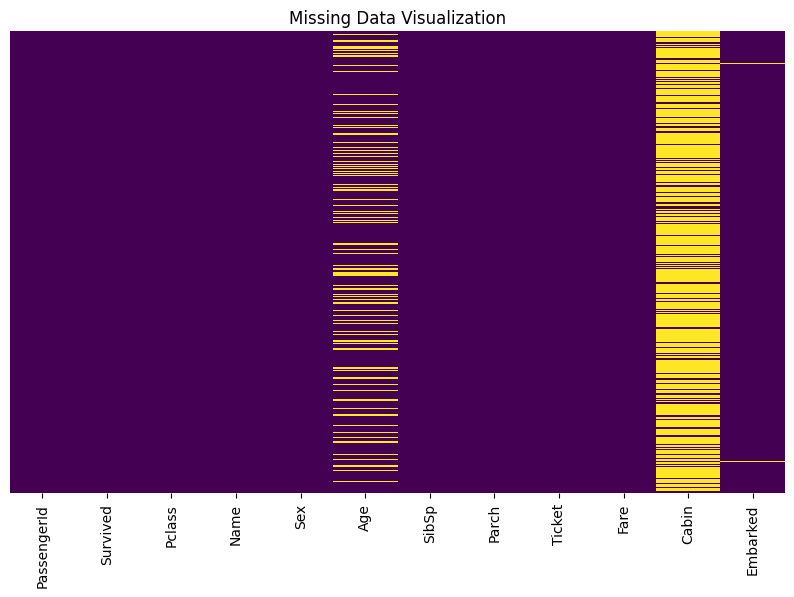

Missing Values Summary:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [51]:


# Check for missing values
missing_values = titanic_df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)


In [54]:
titanic_df.fillna(titanic_df.Embarked.mode()[0],inplace=True)
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,$13.0,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,$30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,S,1,2,W./C. 6607,$23.45,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,$30.0,C148,C


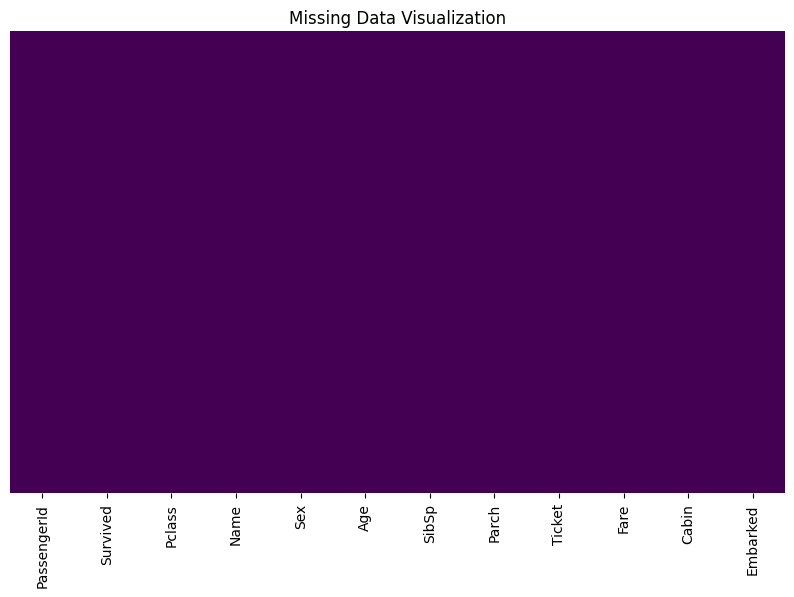

Missing Values Summary:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [53]:

# Check for missing values
missing_values = titanic_df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

#### Fill with Estimated Value

A title is a word used in a person's name, in certain contexts. It may signify either veneration, an official position, or a professional or academic qualification. It's a good indication of age, for example, Mr is for adult man, Master is for young boys.

If we look at all names of Titanic passengers, we can see that the name is in format Last, Title. First. We can use this information to estimate missing ages.

- First, we will use regular expression to extract title from name.
- Then we will convert title to upper case.
- Then we fill missing age with mean age of specific title.

In [55]:
import re
import pandas as pd


# Function to extract title from name
def extract_title(name):
    title_search = re.search(r',\s([^\.]+)\.', name)
    if title_search:
        return title_search.group(1)
    else:
        return ""

# Apply the function to create a new 'Title' column
titanic_df['Title'] = titanic_df['Name'].apply(extract_title)





In [61]:
#Display Tittles
titanic_df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

##### Task13: convert title to upper case.
To ensure we get accurate mean age of each initial, we convert initial to all upper case.

In [62]:
# Convert titles to uppercase
titanic_df['Title'] = titanic_df['Title'].str.upper()

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,S,MR
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C,MRS
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,S,MISS
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S,MRS
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,S,MR


##### Task14: Fill missing age with mean age of the title

In [63]:
# Convert 'Age' column to numeric
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')

# Calculate mean age for each title
title_mean_age = titanic_df.groupby('Title')['Age'].mean()

# Function to fill missing age values based on title
def fill_age_by_title(row):
    if pd.isnull(row['Age']):
        return title_mean_age[row['Title']]
    else:
        return row['Age']

# Apply the function to fill missing age values
titanic_df['Age'] = titanic_df.apply(fill_age_by_title, axis=1)

# Drop the 'Title' column if not needed for further analysis
#titanic_df.drop(columns=['Title'], inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,S,MR
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C,MRS
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,S,MISS
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S,MRS
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,S,MR


In [64]:
#Check missing age
titanic_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

### Feature Engineering
We'll create a new column FamilySize. There are 2 columns related to family size, parch indicates parent or children number, Sibsp indicates sibling and spouse number.

Take one name 'Asplund' as example, we can see that total family size is 7(Parch + SibSp + 1), and each family member has same Fare, which means the Fare is for the whole group. So family size will be an important feature to predict Fare. There're only 4 Asplunds out of 7 in the dataset becasue the dataset is only a subset of all passengers.

##### Task15: Create column 'FamilySize'
FamilySize = Parch + SibSp + 1

In [65]:
# Convert 'Fare' column to numeric
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'].replace('[\$,]', '', regex=True), errors='coerce')

# Create a new column 'FamilySize'
titanic_df['FamilySize'] = titanic_df['Parch'] + titanic_df['SibSp'] + 1

# Explore the relationship between 'FamilySize' and 'Fare'
family_size_fare_corr = titanic_df[['FamilySize', 'Fare']].corr()

# Display correlation matrix
family_size_fare_corr

,FamilySize,Fare
FamilySize,1.000000,0.217138
Fare,0.217138,1.000000


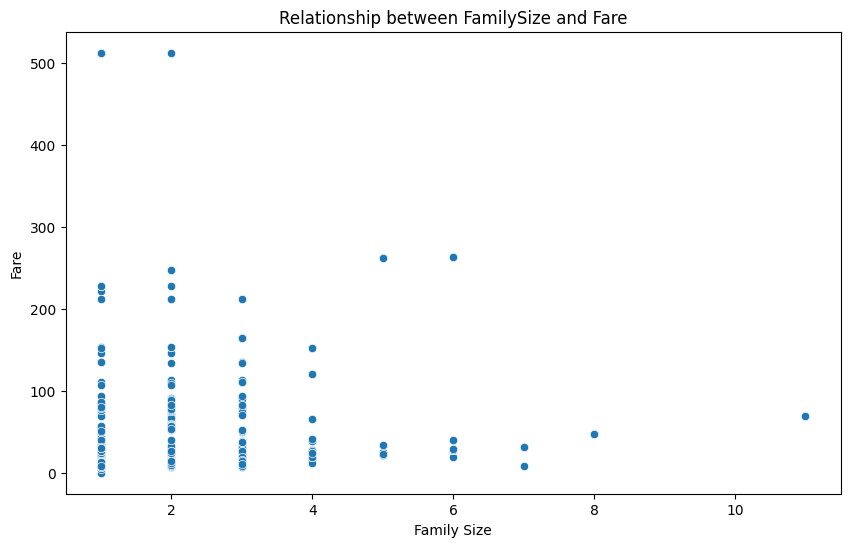

In [30]:
# Optional: Visualize the relationship between 'FamilySize' and 'Fare'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='FamilySize', y='Fare', data=titanic_df)
plt.title('Relationship between FamilySize and Fare')
plt.xlabel('Family Size')
plt.ylabel('Fare')
plt.show()

## Observation 
- Relatively, bigger families were charged less while smaller families were charged more
- i.e The bigger the family the lower the fare 


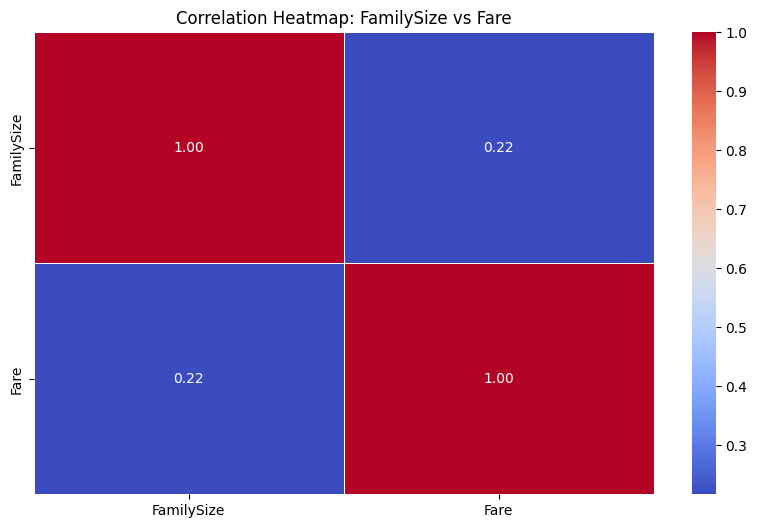

In [66]:


# Creating a heatmap
plt.figure(figsize=(10, 6))
heatmap_data = titanic_df[['FamilySize', 'Fare']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: FamilySize vs Fare')
plt.show()

In [ ]:
#  df_titanic.Parch + df_titanic.SibSp + 1

[Back to Top](#Table-of-Contents)

## Step 4: Modeling

Now we have a relatively clean dataset(Except for Cabin column which has many missing values). We can do a classification on Survived to predict whether a passenger could survive the desaster or a regression on Fare to predict ticket fare. This dataset is not a good dataset for regression. But since we don't talk about classification in this workshop we will construct a linear regression on Fare in this exercise.

##### Task16: Contruct a regresson on Fare
Construct regression model with statsmodels.

Pick Pclass, Embarked, FamilySize as independent variables.

In [43]:
import statsmodels.formula.api as smf
result =smf.ols("Fare ~ C(Pclass) + C(Embarked) + FamilySize", data=titanic_df).fit()
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     131.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.92e-104
Time:                        01:06:34   Log-Likelihood:                -4495.8
No. Observations:                 891   AIC:                             9004.
Df Residuals:                     885   BIC:                             9032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           79.2989      3.543     22.381      0.000      72.345      86.253
C(Pclass)[T.2]     -59.0955      3.921    -15.073      0.000     -66.790     -51.401
C(Pclass)[T.3]     -68.8790      3.253    -21.174      0.000     -75.264     -62.494
C(Embarked)[T.Q]   -11.8147      5.446     -2.169      0.030     -22.504      -1.126
C(Embarked)[T.S]   -14.9202      3.414     -4.371      0.000     -21.620      -8.220
FamilySize           7.8256      0.789      9.919      0.000       6.277       9.374
==============================================================================
Omnibus:                     1043.506   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118621.734
Skew:                           5.718   Prob(JB):                         0.00
Kurtosis:                      58.357   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The provided OLS (Ordinary Least Squares) regression results summarize the relationship between the dependent variable 'Fare' and the independent variables 'Pclass', 'Embarked', and 'FamilySize'. Here's an interpretation of the key components of the above results:

- Coefficients (coef): Intercept (79.2989): The intercept represents the expected value of 'Fare' when all other independent variables are zero. In this context, it's the estimated fare when 'Pclass' is 1, 'Embarked' is 'C', and 'FamilySize' is zero.

- C(Pclass)[T.2] (-59.0955): This is the change in 'Fare' when 'Pclass' is 2 compared to when it is 1.

- C(Pclass)[T.3] (-68.8790): This is the change in 'Fare' when 'Pclass' is 3 compared to when it is 1.

- C(Embarked)[T.Q] (-11.8147): This is the change in 'Fare' when 'Embarked' is 'Q' compared to when it is 'C'.

- C(Embarked)[T.S] (-14.9202): This is the change in 'Fare' when 'Embarked' is 'S' compared to when it is 'C'.

- FamilySize (7.8256): This is the change in 'Fare' for a one-unit increase in 'FamilySize'.

R-squared (0.427) and Adjusted R-squared (0.424):
- R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables. In this case, about 42.7% of the variance in 'Fare' is explained by the model.

F-statistic (131.9):
- The F-statistic tests the overall significance of the model. In this case, the low p-value (1.92e-104) indicates that at least one independent variable is significantly related to 'Fare'.

Prob (F-statistic):
- This is the probability associated with the F-statistic. The low probability observed which is  (< 0.05) suggests that the model as a whole is significant.
  
Other Statistics (Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis, Cond. No.):
- These statistics provide information about the model's assumptions, residuals, and overall fit.

  


## Conclusion:

- In conclusion, this regression model suggests that 'Pclass', 'Embarked', and 'FamilySize' are significant predictors of 'Fare', and the model explains a substantial portion of the variance in 'Fare'